# 相関係数
> 相関係数とは、2つのデータまたは確率変数の間にある線形な関係の強弱を測る指標である。 出典：
[相関係数 出典: フリー百科事典『ウィキペディア（Wikipedia）』](https://ja.wikipedia.org/wiki/%E7%9B%B8%E9%96%A2%E4%BF%82%E6%95%B0)

二つの変数の間に直線的な形の傾向変化があるかどうかを確認することができる指標であり、式で表すと以下のようになります。

$
\frac{\Sigma_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\Sigma_{i=1}^N(x_i - \bar{x})^2 \Sigma_{i=1}^N(y_i - \bar{y})^2 }}
$

以下のような性質があります。

- −1 以上 1 以下の値をとる
- 相関係数が1に近いならば、$x$が増加 → $y$も増加
- $x, y$を低数倍しても相関係数の値は変化しない

## 二つの数値列の相関係数を計算

In [1]:
import numpy as np

np.random.seed(777)  # 乱数を固定するため

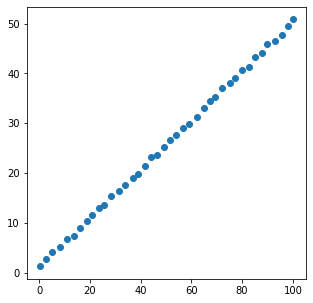

[[1.         0.99979848]
 [0.99979848 1.        ]]


In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = [xi + np.random.rand() for xi in np.linspace(0, 100, 40)]
y = [yi + np.random.rand() for yi in np.linspace(1, 50, 40)]

plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.show()

coef = np.corrcoef(x, y)
print(coef)

## 複数の変数の間の相関係数をまとめて計算

```{hint}
[pandas.io.formats.style.Styler.background_gradient](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html)
```

In [3]:
import seaborn as sns

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 全ての変数間の相関係数を確認する
irisデータセットを使って、変数間の相関を見てみます。

```{hint}
- [The Iris Dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- [pandas.io.formats.style.Styler.background_gradient](https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html)
```

In [4]:
df.corr().style.background_gradient(cmap="YlOrRd")

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


ヒートマップだとどこが最も相関が高いか見づらいです。`sepal_length` と相関が高い変数はどれか、棒グラフで確認します。


```{hint}
[pandas.DataFrame.plot.bar](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
```

<AxesSubplot:ylabel='corr'>

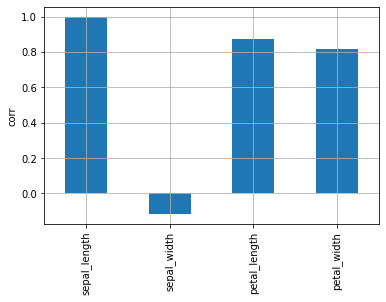

In [5]:
df.corr()["sepal_length"].plot.bar(grid=True, ylabel="corr")

## 相関係数が低い場合
相関係数が低い場合のデータ分布を確認し、変数間に関係がある場合でも相関係数が低くなる可能性があることを確認します。

```{hint}
[numpy.random.multivariate_normal — NumPy v1.22 Manual](numpy.random.multivariate_normal)

random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
```

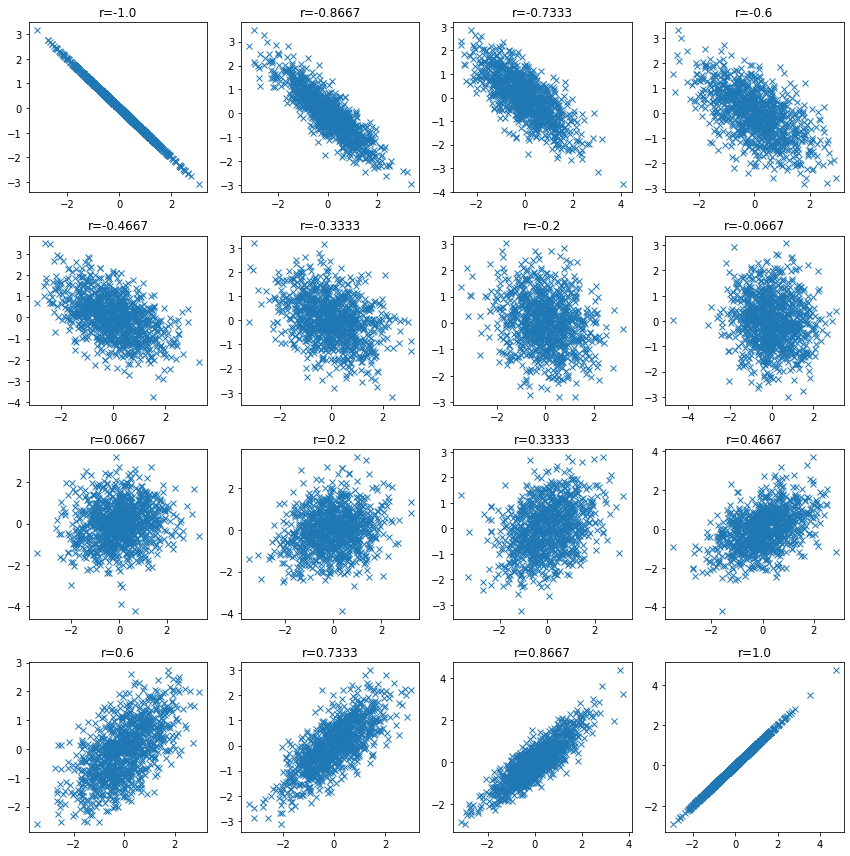

In [6]:
n_samples = 1000

plt.figure(figsize=(12, 12))
for i, ci in enumerate(np.linspace(-1, 1, 16)):
    ci = np.round(ci, 4)

    mean = np.array([0, 0])
    cov = np.array([[1, ci], [ci, 1]])

    v1, v2 = np.random.multivariate_normal(mean, cov, size=n_samples).T

    plt.subplot(4, 4, i + 1)
    plt.plot(v1, v2, "x")
    plt.title(f"r={ci}")

plt.tight_layout()
plt.show()

相関係数が低くても、変数の間に関係があるケースもあります。
そのような例を簡単にですが作ってみます。

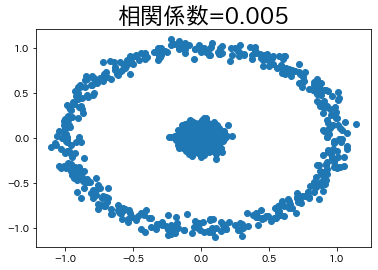

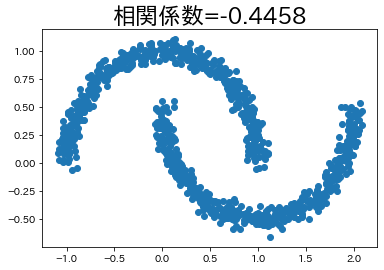

In [7]:
import japanize_matplotlib
from sklearn import datasets

japanize_matplotlib.japanize()

n_samples = 1000
circle, _ = datasets.make_circles(n_samples=n_samples, factor=0.1, noise=0.05)
moon, _ = datasets.make_moons(n_samples=n_samples, noise=0.05)

corr_circle = np.round(np.corrcoef(circle[:, 0], circle[:, 1])[1, 0], 4)
plt.title(f"相関係数={corr_circle}", fontsize=23)
plt.scatter(circle[:, 0], circle[:, 1])
plt.show()

corr_moon = np.round(np.corrcoef(moon[:, 0], moon[:, 1])[1, 0], 4)
plt.title(f"相関係数={corr_moon}", fontsize=23)
plt.scatter(moon[:, 0], moon[:, 1])
plt.show()